<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## PEC 3: Agrupamientos bio-inspirados: Clustering con algoritmos genéticos



### Presentación

En esta PAC utilizaremos herramientas de optimización con algoritmos genéticos para implementar un sistema de agrupamiento de datos (clustering).

### Competencias

En este enunciado se trabajan las siguientes competencias generales de
máster:
- Capacidad para proyectar, calcular y diseñar productos, procesos e
instalaciones en todos los ámbitos de la ingeniería informática.
- Capacidad para el modelado matemático, cálculo y simulación en
centros tecnológicos y de ingeniería de empresa, particularmente en
tareas de investigación, desarrollo e innovación en todos los ámbitos
relacionados con la ingeniería informática.
- Capacidad para aplicar los conocimientos adquiridos y solucionar
problemas en entornos nuevos o poco conocidos dentro de contextos
más amplios y multidisciplinares, siendo capaces de integrar estos
conocimientos.
- Poseer habilidades para el aprendizaje continuo, autodirigido y
autónomo.
- Capacidad para modelar, diseñar, definir la arquitectura, implantar,
gestionar, operar, administrar y mantener aplicaciones, redes,
sistemas, servicios y contenidos informáticos.

Las competencias específicas de esta asignatura que se trabajan en esta
prueba son:
- Entender qué es el aprendizaje automático en el contexto de la
inteligencia artificial.
- Distinguir entre los diferentes tipos y métodos de aprendizaje.
- Aplicar las técnicas estudiadas a un caso real.

### Objectivos

- Aprender a formular un problema de agrupamiento de datos como un proceso de optimización
- Aplicaremos técnicas de optimización basadas en algoritmos genéticos

### Recursos

Esta PEC requiere los siguientes recursos:

Archivos proporcionados:

   * Esta libreta de Python (.ipynb), que a la vez es el enunciado y el archivo que debe devolverse con las soluciones a los diferentes ejercicios.

Complementarios:
   * Manual de teoría de la asignatura
   * Documentación de las librerías utilizadas:
       - _scikit-learn_ https://scikit-learn.org/stable/
       - _deap_ https://deap.readthedocs.io/en/master/
       - _numpy_ https://numpy.org/
       - _matplotlib_ https://matplotlib.org/stable/index.html

   * Artículo científico en el que se basa el ejercicio (pdf):

Maulik, Ujjwal, y Sanghamitra Bandyopadhyay. "Genetico algorithm-based clustering técnico." Pattern Recognition 33.9 (2000): 1455-1465.
https://www.sciencedirect.com/science/article/abs/pii/S0031320399001375

### Entrega y criterios de evaluación

La práctica debe entregarse el **17 de mayo de 2022**.

La entrega debe incluir una versión editada de este cuaderno (.ipynb). Se recomienda el uso de Google Colab (https://colab.research.google.com/). El código de las soluciones a los ejercicios debe implementarse y ejecutarse en las celdas de código proporcionadas y las respuestas justificadas deben añadirse a las celdas de texto correspondientes.

Todas las respuestas deben estar correctamente razonadas y justificadas. **Las soluciones que no vayan acompañadas de la correspondiente respuesta razonada no serán evaluadas**.

Los ejercicios se valorarán de la siguiente forma:
* Actividad 1: 3 puntos
* Actividad 2: 4 puntos
* Actividad 3: 3 puntos

Cada ejercicio será evaluado teniendo en cuenta tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y resultados.


### Descripción de la PEC

### Ejercicio 1: Generación y exploración de datos [3 puntos]

El objetivo de esta PAC es diseñar un sistema de agrupamiento de datos utilizando algoritmos genéticos. Antes de empezar deberemos generar los datos sintéticos con los que trabajaremos para realizar las diferentes pruebas:

a) [1 punto] Utilice la función __make_blobs_ de las librerías _scikit-learn_ para generar $N = 1500$ observaciones en un espacio de atributos bidimensional que estén distribuidas en tres clustas con centroides ubicados en (1, -1), ( 5, 5) y (10,10). El resultado será una matriz de datos $X$ de dimensiones $N\times 2$. Encontrará la documentación de esta función en

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [1]:
from sklearn.datasets import make_blobs
import numpy as np


centers = np.array([(1,-1), (5,5), (10,10)])
X, y = make_blobs(n_samples=1500, centers=centers)
X.shape

array([[ 9.66101500e+00,  1.02306241e+01],
       [ 1.06153078e+01,  1.11749757e+01],
       [ 4.92463766e-01, -9.17513637e-03],
       ...,
       [ 2.30999406e-01, -2.53224156e-02],
       [ 7.77224449e-01,  1.34545809e+00],
       [ 5.50566543e+00,  3.62801820e+00]])


b) [1 punto] Represente gráficamente los datos anteriores utilizando un diagrama de dispersión de puntos (scatterplot) de las librerías matplotlib con diferentes colores para las observaciones de cada grupo. Indique la posición de los centroides de cada uno de los clusters obtenidos.

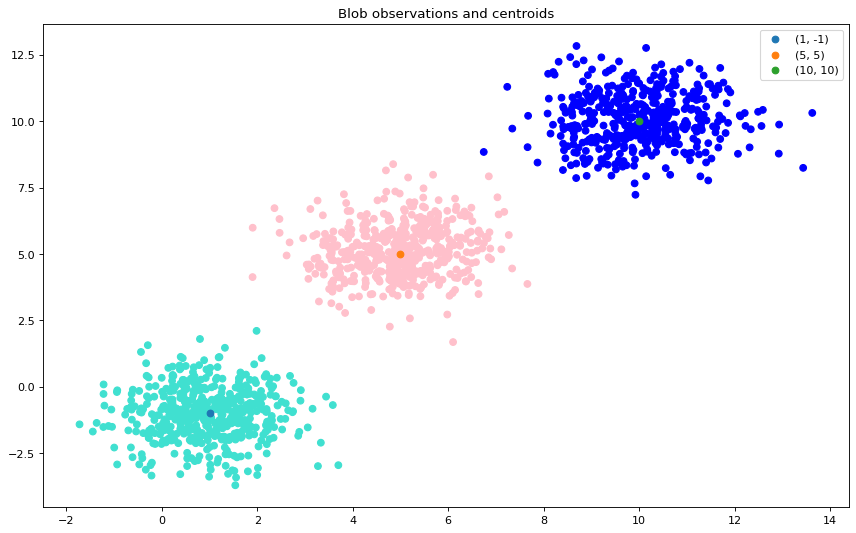

In [102]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(13, 8), dpi=80)


colors = np.array(['turquoise', 'pink', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
for center in centers:
    x, y = center
    plt.scatter(x, y, label=f"({x}, {y})")
plt.legend()
plt.title("Blob observations and centroids")
plt.show()

c) [1 punto] Aplique el algoritmo de agrupamiento k-means con k=2 y represente la solución obtenida utilizando un diagrama de dispersión de puntos (scatterplot) con diferentes colores para las observaciones de cada grupo.

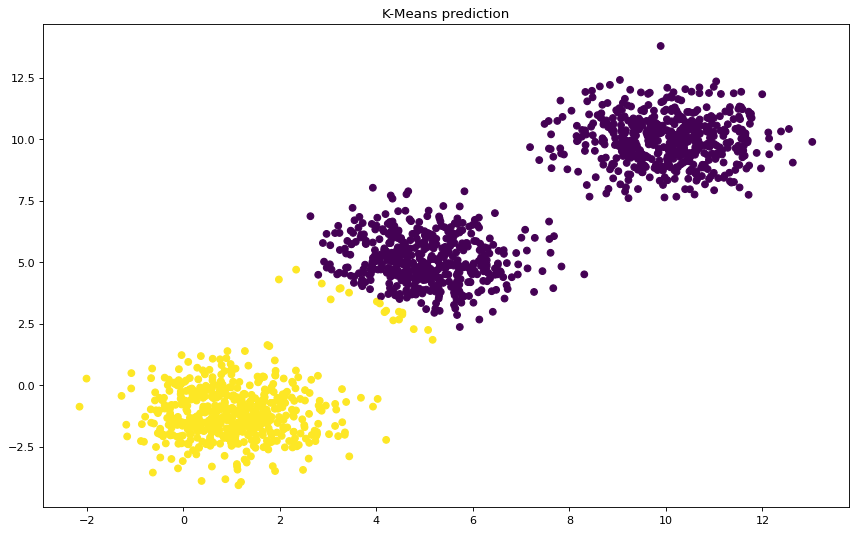

In [99]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

figure(figsize=(13, 8), dpi=80)


y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-Means prediction")
plt.show()

### Ejercicio 2: Agrupación con algoritmos genéticos [4 puntos]

Lo primero que debe hacerse para implementar un algoritmo genético es decidir cómo codificar una solución del problema. En un problema de agrupamiento, codificaremos una solución a partir de los centroides de los distintos clusters que queremos encontrar.
Específicamente, una solución será un vector hilera de dimensiones $1 \times d*k $ donde $k$ es el número de clusters que queremos identificar en los datos y $d$ es la dimensionalidad de los datos (número de atributos). Dado que en nuestro caso los datos que hemos generado tienen d=2 y k=3, procederemos a utilizar estos valores durante todo el ejercicio y la codificación de una solución $S$ vendrá dada por el vector de dimensiones $1 \times 6 $

$S = (cx_1, cy_1, cx_2, cy_2, cx_3, cy_3)$

donde $(cx_i,cy_i)$ representan las coordenadas (x,y) del centroide del cluster $i=1...3$.

La función _cluster_data_ que le facilitamos a continuación se encarga de asignar las observaciones de la matriz de datos X al clúster más cercano de una solución $S$. Específicamente, la función toma una solución como entrada y devuelve las magnitudes cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist. La función utiliza las variables globales num_clusters ($k=3$), feature_vector_length ($d=2$) y X (matriz de datos a las que queremos aplicar el agoritmo, en nuestro caso de dimensiones $N \times d = 1500 \times 2$).

**NOTA IMPORTANTE**: Todos los códigos tendrán que ser escritos de forma que se puedan ejecutar por un problema con un número arbitrario de dimensiones $d$ y de clústeres $k$.

In [1]:
def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution):
    global num_clusters, feature_vector_length, X
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(X, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

a) [1 punto] Explique brevemente a qué corresponden cada una de las magnitudes que devuelve la función _cluster_data_

- cluster_centers:
- all_clusters_dists:
- cluster_indices:
- clusters:
- clusters_sum_dist:

### cluster_centers

Considerando los siguientes parámetros de la función `cluster_data`:
* `solution`: Lista (o vector) con centroides de clústers indexados con coordenadas x e y
* `feature_vector_length`: Corresponde a _d_, la dimensión de los datos o número de atributos
* `clust_idx`: índice para iterar sobre el número de clústers

El programa construye una lista de centroides `cluster_centers` iterando sobre la solución y utilizando como índices de la iteración `feature_vector_length` (_d_) y el número de clústers (`range(num_clusters)`, `cluster_idx`) itera a pares sobre la solución para coger _d_ valores de la lista _S_. En cada iteración se utiliza el índice creado en el for y se extrae mediante _list_slicing_ de _solution_.
```
solution[d*cluster_idx:d*cluster_idx+1] = solution[0:2], solution[2:4], ...
```


### all_clusters_dists

Contiene un array con todas las distancias euclideas que hay entre los centroides anteriormente calculados y la matriz X.

### cluster_indices

Se construye mediante la función `numpy.argmin` que devuelve los índices del array de distancias euclideas anteriormente calculado cuyo valor es mínimo respecto a un eje, en este caso el eje 0. 

### clusters (pendiente)

De manera similar a `cluster_centers` se construye un índice que itera sobre el número de clusters. En cada iteración, se utiliza la función `numpy.where` que devuelve elementos que cumplan la condición de

### clusters_sum_dist (pendiente)

...

b) [1 punto] Para formular el problema de agrupamiento como un problema de optimización lo primero que hay que entender es que una solución óptima presentará
un valor mínimo de la distancia euclídea entre cada una de las observaciones $\vec{x}_j, j = 1,..N$ y el centroide del clúster al que han sido asignadas $D$. Cree una función de fitness definida como el inverso de la magnitud $D$ y que será la que deberá maximizar utilizando algoritmos genéticos.

In [17]:
def evaluate(individual):
    return 1/sum(individual),

c) [1 punto] Utilice las librerías DEAP para inicializar un algoritmo genético que maximice la función de fitness definida en el apartado anterior y en el que los individuos son soluciones $D$ del problema de agrupamiento. Los detalles de este algoritmo son los siguientes:

- Utilice una inicialización aleatoria de los individuos con un valor entre -10 y +10.
- Aplique una estrategia de mutación gaussiana con media $\mu = 0$ y desviación típica $\sigma = 5$ con una probabilidad de mutación de 0.2.
- El método de selección será el mejor entre 3 escogidos aleatoriamente
- El método de cruce en un punto

Consulte la documentación de las librerías DEAP para concretar los detalles de la implementación https://deap.readthedocs.io/en/master/

Para instalar y cargar las librerías DEAP en el entorno google colab ejecute el código siguiente

In [2]:
!pip install deap
from deap import creator, base, tools, algorithms

  Using cached deap-1.3.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (160 kB)
You should consider upgrading via the '/home/pablo/.virtualenvs/IA/bin/python -m pip install --upgrade pip' command.


In [20]:
from random import randint

creator.create("fitnessMax", base.Fitness, weights=(1.0,))
creator.create("individual", list, fitness=creator.fitnessMax)

toolbox = base.Toolbox()
toolbox.register("attrInt", randint, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attrInt, n=10)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

d) [1 punto] Ejecute el algoritmo genético definido en el apartado anterior con un total de 1000 generaciones con un tamaño de población de 10 individuos y represente gráficamente la evolución de la función de fitness promitido en cada generación.

In [19]:
pop = toolbox.population(n=10)
CXPB, MUTPB, NGEN = 0.5, 0.2, 1000

# Evaluate the entire population
fitnesses = map(toolbox.evaluate, pop)
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

for g in range(NGEN):
    # Select the next generation individuals
    offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
    offspring = map(toolbox.clone, offspring)

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # The population is entirely replaced by the offspring
    pop[:] = offspring

print(pop)

ZeroDivisionError: division by zero

### Ejercicio 3: Análisis de los resultados [3 puntos] 

a) [1 punto] Represente gráficamente la solución del grupo obtenido con el algoritmo genético utilizando un diagrama de dispersión de puntos (scatterplot) con diferentes colores para las observaciones de cada grupo. Indique la posición de los centroides de cada uno de los clusters obtenidos.

b) [1 punto] Represente gráficamente la evolución de los centroides en cada una de las iteraciones del algoritmo k-means. Utilice los parámetros _n_init_ para hacer que k-means sólo se ejecute una vez por iteración y _max_iter_ para controlar el número de iteraciones realizadas.

c) [1 punto] Represente gráficamente la evolución de los centroides cada 100 generaciones del algoritmo de agrupamiento con algoritmos genéticos.

### Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios del Grado Multimedia, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.

Otro punto a considerar es que cualquier práctica que haga uso de recursos protegidos por copyright no podrá en ningún caso publicarse en Mosaic, la revista del Grado en Multimedia en la UOC, a no ser que los propietarios de los derechos intelectuales den su autorización explícita.
